<a href="https://colab.research.google.com/github/dla9944/apatheia/blob/main/pandas_plus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas 요약

* Numpy : 다차원 배열 데이터
   * 정해진 길이, 정해진 타입, 정수 인덱스
   * 벡터화 연산 ↔ 리스트 연결, 복사...
   * 특정한 배열에 속한 원소들에 대해서 반복적 연산
   * 불리언 인덱스 배열 ◀ 필터링
* Pandas : 2차원 배열, 행렬 형태의 딕셔너리 같이 키를 갖고 있는 데이터 (행과 열 모두 인덱스)
   * 엑셀, 표 형태의 일반적으로 볼 수 있는 데이터
   * 값들은 배열입니다 (열 단위의) → numpy, ndarray
   * 값마다 인덱스가 배정되어 있습니다. 인덱스는 굳이 정수일 필요가 없고, 특정한 값을 붙여줍니다. 이것이 '라벨'. 문자열, 정수, 시간, 날짜... → 인덱싱, 인덱서로 호출합니다.
   * '라벨' → 딕셔너리 유사 → 키를 통해서 데이터 묶음에다가 특정한 데이터를 CRUD, 생성, 읽기, 수정, 삭제합니다

 >  ✍ 데이터 분석, 특성을 확인하기 위한 작업 → Pandas → 인간이 보기가 좋음 (이해, 분석)  <br> 모델링, 프로그램 → 컴퓨터가 작업을 해주기 위한 형태로 변형 → Numpy → 속도가 빠르고, 컴퓨터가 효율적으로 변형, 분석합니다.

 

시리즈 (Series)

Serial / Series ; (영, 미) 연속되어 있다
→ 배열(Array), 리스트(List)
  * 이름 : 원소들마다 부르는 이름
  * 사물함(키-값) → 딕셔너리

```
pd.Series(...) # 연속된 데이터 묶음
# 리스트, 배열 등을 삽입
# index : 연속된 데이터 묶음 → 시리즈 내의 데이터와 매칭이 되는 나열된 이름들
# → 시리즈 내의 데이터와 매칭이 되는 나열된 이름들
$ index를 안 넣어주면 range, arange 같이 해당 길이와 맞는 정수 인덱스가 자동으로 부여됨 (0~len)
```




In [3]:
import pandas as pd

In [4]:
s = pd.Series([9904312, 3448737, 2890451, 2466052],   # 연속된 데이터 묶음 (리스트, 튜플, 1차원 배열...)
              index=["서울", "부산", "인천", "대구"]) # 넣어준 데이터의 길이와 일치하는 인덱스 묶음을 넣으면 
                                                      # 순서대로 짝지어서 데이터가 들어갑니다 
                                                      # 인덱스를 안 넣어주면 range 비슷하게 생성 (길이가 맞춰서)
s

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

* `s.index` : 시리즈의 인덱스 (라벨링 된 이름들)
* `s.values` : 시리즈의 값(배열) ▶ 같은 타입

In [7]:
s

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [5]:
s.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [6]:
s.values

array([9904312, 3448737, 2890451, 2466052])

* `s.name`, `s.index.name` : 시리즈 자체나 인덱스의 이름을 붙일 수 있습니다

## 시리즈 연산
* Numpy 배열(ndarray)과 유사합니다. 그래서 **벡터화 연산**이 가능합니다.
* 연산 자체는 '값'(배열) ▶ 인덱스 적용이 안됩니다.

## 시리즈 인덱싱과 슬라이싱
* 시리즈 : 배열이자 딕셔너리와 유사하기 때문에 numpy배열에서 사용 가능한 인덱스 방법(정수 인덱싱, 배열 인덱싱) 전부 사용 가능합니다.
* 인덱스 라벨을 이용한 인덱싱도 가능합니다. 딕셔너리 처럼 키로 호출할 수 있습니다

인덱싱이 가능하다는 것은 슬라이싱(부분집합 만들기)도 가능합니다. 일종의 사물함

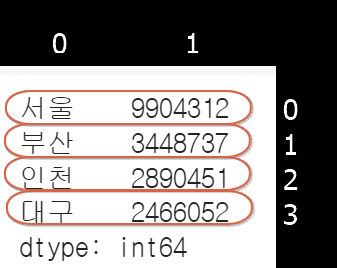

In [9]:
s

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

## 벡터화 연산 ▶ 모든 데이터에 대한 특정 조건 만족 여부 (T/F)
→ ==, ><, ... ▶ 불리언 배열 ▶ 불리언 배열 인덱싱이 시리즈에서도 가능합니다

## 슬라이싱

* 라벨 슬라이싱 ▶ 다른 점은 범위를 지정했을 때, ("a":"b") 가 라벨 슬라이싱에서는 b가 포함 됩니다.
* 판다스 → 라벨을 통해서 해당 데이터를 속성처럼 호출할 수 있습니다
`series.속성명` → 해당 라벨을 호출해서 사용합니다
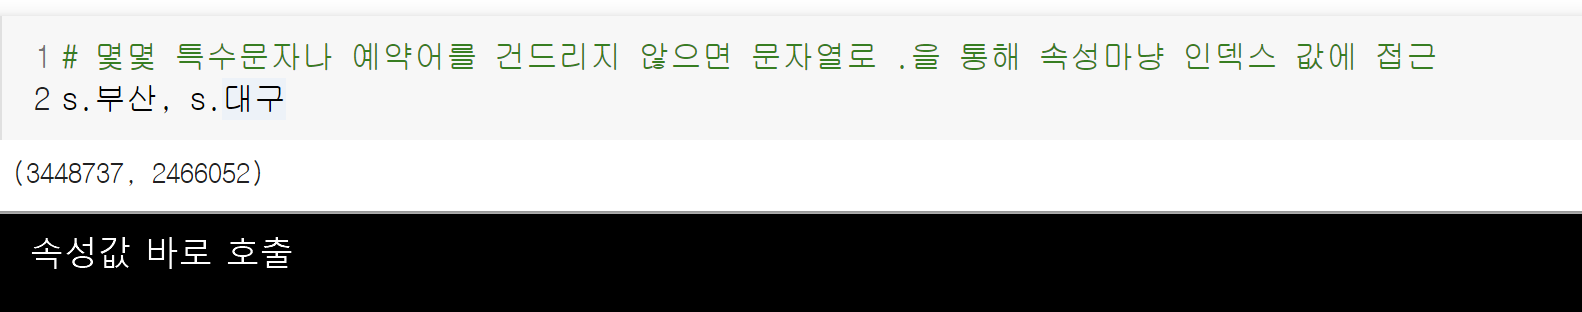

* 변수명으로 지정할 수 있는 일반적인(공백없는) 단어들로 구성된 라벨은 시리즈에 `.` 을 통해서 속성으로 호출

## 인덱스 기반 (시리즈 간) 연산
* 시리즈는 value에 한해서 벡터화 연선
* 시리즈 들 간에도 벡터화 연산
* 인덱스 라벨 일치하는 값들에 한해서 시리즈 간 연산
* 라벨이 일치하지 않는다 (한 쪽에 라벨이 비어 있습니다) → `NaN`
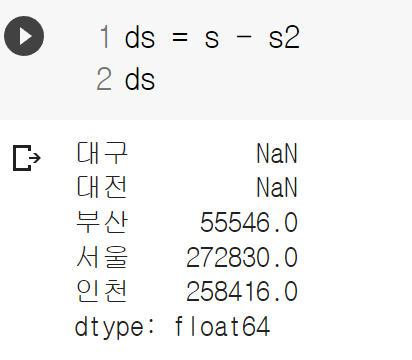

* `NaN` 은 `Null : series.notnull()` : 불리언 배열 값 인덱싱을 비어있지 않은 값들을 호출합니다

## 데이터의 갱신, 추가, 삭제 (인덱싱)

* 딕셔너리처럼 인덱싱해서 → 새로운 키 값을 주면 해당 키 값에 대해서 새로운 값을 할당합니다. 기존에 존재하던 키를 호출한 다음에 수정. `del`로 지워주면 됩니다.
* 배열처럼 인덱싱해서 새롭게 키를 만들어서 처리할 수 없습니다. 배열이기 때문입니다.

## 데이터프레임 (DataFrame)
* 시리즈 : 1차원 배열 데이터 + 행방향 인덱스
* 데이터프레임 : 2차원 배열 데이터 + 행방향 인덱스 & 열방향 인덱스

### 데이터프레임 생성
* 하나의 열이 될 수 있는 데이터 묶음(리스트, 일차원)
  ` + 원하는 만큼의 구성할 열
* 열의 이름을 키로 가지는 딕셔너리 → 키 : 연속된 데이터(타입이 다 동일해야 합니다)
* 이 데이터를 'pd.DataFrame( )` 으로 넣어줍니다.
    * 열 방향 인덱스를 넣어주고 싶다 : `pd.DataFrame(columns=...)`
    * 행 방향 인덱스를 넣어주고 싶다 : `pd.DataFrame(index=...)`


In [33]:
data = {
    "2015": [9904312, 3448737, 2890451, 2466052],
    "2010": [9631482, 3393191, 2632035, 2431774],
    "2005": [9762546, 3512547, 2517680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990],
    "지역": ["수도권", "경상권", "수도권", "경상권"],
    "2010-2015 증가율": [0.0283, 0.0163, 0.0982, 0.0141]
}
columns = ["지역", "2015", "2010", "2005", "2000", "2010-2015 증가율"]
index = ["서울", "부산", "인천", "대구"]
df = pd.DataFrame(data, index=index, columns=columns)
df

,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [11]:
df.values # 데이터 (배열)


array([['수도권', 9904312, 9631482, 9762546, 9853972, 0.0283],
       ['경상권', 3448737, 3393191, 3512547, 3655437, 0.0163],
       ['수도권', 2890451, 2632035, 2517680, 2466338, 0.0982],
       ['경상권', 2466052, 2431774, 2456016, 2473990, 0.0141]], dtype=object)

In [12]:
df.columns # 열 이름들, 컬럼들(열방향 인덱스)


Index(['지역', '2015', '2010', '2005', '2000', '2010-2015 증가율'], dtype='object')

In [14]:
df.index # 행 이름들, 행방향 인덱스


Index(['서울', '부산', '인천', '대구'], dtype='object')

In [15]:
df.T # 데이터프레임의 행 → 열, 열 → 행

,서울,부산,인천,대구
지역,수도권,경상권,수도권,경상권
2015,9904312,3448737,2890451,2466052
2010,9631482,3393191,2632035,2431774
2005,9762546,3512547,2517680,2456016
2000,9853972,3655437,2466338,2473990
2010-2015 증가율,0.0283,0.0163,0.0982,0.0141


In [21]:
df['2015'] # 새로운 데이터를 넣어줌 (길이가 맞아야 함)
#df.shape → (행 길이, 열 길이) → 행의 길이

SyntaxError: ignored

## 열 인덱싱

* 열과 행의 위치를 뒤바꿔 버립니다

In [42]:
df[열 라벨] = 시리즈
df[[열1, 열2]] = 데이터 프레임
# df[0] -> 특정 라벨을 인덱스에 넣는다 = 키값 = 열 라벨
# 정수형 인덱스 -> 딕셔너리 키 X -> 에러가 난다
# 정수형 인덱스 = 열 라벨의 이름 / 위치? -> 정수형 인덱스
# Key Error

SyntaxError: ignored

In [60]:
df['2000'] # 단일

서울    9853972
부산    3655437
인천    2466338
대구    2473990
Name: 2000, dtype: int64

In [74]:
df[['2010','2005']] # 복수

,2010,2005
서울,9631482,9762546
부산,3393191,3512547
인천,2632035,2517680
대구,2431774,2456016


## 행 인덱싱
* 행과 열의 위치를 뒤바꿔 버립니다

In [ ]:
# 범위로 (:) <- 슬라이싱을 한다
df[0:1]
# 정수형을 넣게되면 -> 끝점을 제외하고 범위 -> 데이터프레임
df['서울':'대전']
# 문자열을 넣게되면? -> 라벨 인덱싱 -> 끝점 포함

In [75]:
df['서울':'부산']

,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163


In [77]:
df['인천':'대구']

,지역,2015,2010,2005,2000,2010-2015 증가율
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


## 개별 인덱싱

In [84]:
df['열이름'] # 시리즈
df['열이름']['행이름'] # 개별값

KeyError: ignored

In [83]:
df['2000']['서울']

9853972

## 데이터 입출력

✋(자주 안쓴다고 함)
* 데이터 → pandas → 표 형태의 데이터
* csv - excel과 유사해보입니다. 엑셀은 서식(폰트, 꾸미기) 등이 존재해서 속도가 느리고 용량이 큽니다.
* 하지만 csv는 핵심만 남겨서 데이터 자체와 데이터를 구분해주는 콤마 만 가지고 데이터를 구분해줍니다.
* 용어 : comma seperated value

In [85]:
read_xxx / to_xxx

NameError: ignored

In [86]:
pd.read_csv("파일이름") # 경로, url

FileNotFoundError: ignored

In [87]:
pd.read_excel(...) / pd.to_excel(...)

ValueError: ignored

## 입출력 추가 명령어

* df # 읽어와서 무엇부터 볼 것인가
* df.head() # 괄호 안에 갯수를 넣으면 상단부터 불러올 갯수를 지정합니다
* df.tail() # 괄호 안에 갯수를 넣으면 하단부터 불러올 갯수를 지정합니다.

## 데이터프레임의 고급 인덱싱 (`loc`, `iloc`)

* 인덱싱 → 특정한 데이터를 골라내는 것
→ (기준) → 라벨 인덱스, 배열 - 정수인덱스
* 기본 인덱싱(` [ ] `) : 열(라벨, 라벨리스트), 행(`:` 라벨 범위)
* Numpy에서 행렬 기반으로 인덱싱 ↔ pandas의 기본 인덱싱과 매칭이 안됩니다
* 행, 열 기반으로 인덱싱을 하고 싶을때 `loc`, `iloc`를 사용

### 설명
* loc : 라벨 인덱스 (딕셔너리 키)
* iloc : 정수 인덱스 (리스트, 배열에서의 나열된 원소의 위치)


#### 일반적인 메소드

`( )` 소괄호 사용

#### loc와 iloc

* '[ ]' 대괄호 사용
* `indexer` 인 (r_, c_) 사용

##loc 시작

##기능

df.loc[행 인덱싱 값]

df.loc[행 인덱싱 값, 열 인덱싱 값]


In [88]:
df.loc[행 인덱싱 값] # 행만 넣어주거나요
df.loc[행 인덱싱 값, 열 인덱싱 값]
# 행, 열을 순서대로 넣어주거나 <정수>, 문자열 인덱스를 넣어줍니다.
range, arange

SyntaxError: ignored

### 들어갈 수 있는 것
인덱스 데이터, 인덱스 데이터 슬라이스, 인덱스 데이터리스트, 
<br>같은 행 인덱스를 가지는 불리언 시리즈(행 인덱싱의 경우), 위의 값들을 반환하는 함수


In [90]:
df.loc[행 인덱싱 값] # 행만 넣어주거나요
df.loc[행 인덱싱 값, 열 인덱싱 값]
# 행, 열을 순서대로 넣어주거나 <정수>, 문자열 인덱스를 넣어줍니다.
range, arange
# 인덱스 데이터 / df.loc['서울']df.loc[0] 행
# 인덱스 데이터 슬라이스
# df.loc['서울':'부산']df.loc[0:1] (라벨)
# df.loc 불리언 배열 인덱싱 (필터링)도 가능합니다


SyntaxError: ignored

" : " 은 모든 것을 검색

In [93]:
df.loc[행] << df.loc[열] # 행부터는 넣어도 되고, 열부터 넣으면 안됩니다. 행부터 넣으면 key error
df.loc[:,열] = df[열 정보값] 

SyntaxError: ignored

## iloc 시작


## 설명

* iloc 는 라벨이 아니라 순서를 나타내는 integer + loc
* loc 도 정수를 사용할 수 있지만 부여된 정수만을 사용합니다. 단, 0번 자리인데 100이 들어가는 것은 불가능
* iloc는 우리가 부여한 값이 아니라 value(배열) 에서의 위치를 의미합니다 (절대값은 수정 x)

### 들어갈 수 있는 것
df.iloc[행 순서 정수 인덱스]

df.iloc[행 순서 정수 인덱스, 열 순서 정수 인덱스]


* 슬라이스는 작동하고 끝은 포함하지 않습니다.

In [94]:
df.iloc [행 순서 정수 인덱스]
df.iloc [행 순서 정수 인덱스, 열 순서 정수 인덱스]


SyntaxError: ignored

### 중대한 차이점

* loc : 조건을 넣어서 필터링 가능
* iloc : list 인덱싱 X